In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
data = np.load('/content/drive/MyDrive/Xy_train.npz')
X_train = data['X']
y_train = data['y']
data = np.load("/content/drive/MyDrive/X_test.npz")
X_test = data['X']

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX_normal = scaler.fit_transform(X_train)
scaler = StandardScaler()
testX_normal = scaler.fit_transform(X_test)

In [4]:
from keras.utils import to_categorical
trainy = to_categorical(y_train)

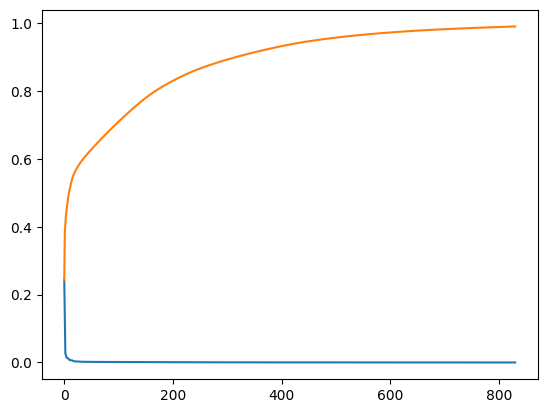

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=0.99, whiten=True).fit(trainX_normal)
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

After PCA, we can see the 600 features can explain most of the data variance in this set. Then dimension can decrease to 600

In [6]:
Xtest = pca.transform(testX_normal)
Xtrans = pca.transform(trainX_normal)

In [7]:
component = Xtrans.shape[1]
component

831

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.initializers import he_normal
from keras.backend import clear_session
import tensorflow as tf
y = np.zeros((100000,))
tf.random.set_seed(43)
for i in range(8):
  clear_session()
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(component,), kernel_initializer=he_normal(43)))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu', kernel_initializer=he_normal(43)))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu', kernel_initializer=he_normal(43)))
  model.add(Dropout(0.25))
  model.add(Dense(8, activation='softmax'))
  model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=['accuracy'])
  model.fit(Xtrans, trainy, batch_size=512, epochs=20)
  pred = model.predict(Xtest)
  y_pred = np.array([i.argmax() for i in pred]).reshape((100000,))
  y += y_pred
y = y/8

Epoch 1/20
782/782 [==============================] - 6s 4ms/step - loss: 1.6544 - accuracy: 0.3422
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.4487 - accuracy: 0.4126
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.3614 - accuracy: 0.4478
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2924 - accuracy: 0.4742
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2386 - accuracy: 0.4970
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1951 - accuracy: 0.5159
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1559 - accuracy: 0.5307
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1235 - accuracy: 0.5447
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 1.0970 - accuracy: 0.5552
Epoch 10/20
782/782 [==============================] - 3s 4ms/step - loss: 1.0718 - accuracy: 0.5663

In [9]:
y = [round(i) for i in y]

In [10]:
from typing import Counter
import pandas as pd
print(Counter(y).items())
a = pd.read_csv('(1)y679zhao.csv')
print(Counter(a['Predicted']).items())

dict_items([(6, 14714), (3, 7995), (4, 19597), (2, 13180), (0, 18619), (7, 4681), (5, 10091), (1, 11123)])
dict_items([(6, 13671), (3, 9590), (7, 5665), (4, 16802), (2, 12519), (0, 17753), (1, 12489), (5, 11511)])


In [11]:
import pandas as pd
y = pd.DataFrame(y)
y.columns = ['Predicted']
y.index = y.index
y.index.name = 'ID'
y.to_csv('y679zhao.csv')